In [1]:
import numpy as np
import itertools
import traceback
import random as rd
from matplotlib import pyplot as plt
#idk if I'll need all of these but they sure do help

In [33]:
num_players = 2
pop = 10000
moves = list(range(7)) #move of 3 represents the decision to select a Type 3 square as a pickup location
collect_payoff = 50
handover_payoff = 50
delivery_payoff = 50

In [17]:
def payoff(my_move:int, their_move:int, package_collector = False):
    if package_collector: #if collector (ie. Player 1), costs are easy
        if my_move + their_move == 6:
            return (collect_payoff + handover_payoff - (2.3 + my_move)**2)
        return (collect_payoff - (2.3 + my_move)**2)
    #if not collector, use variable expected cost based on avg. distance
    costs = {0:2.3, 1:1.3, 2:0.77, 3:0.6, 4:0.77, 5:1.3, 6:2.3}
    if my_move + their_move == 6:
        return (handover_payoff + delivery_payoff - (costs[my_move] + my_move)**2)
    return -(costs[my_move] + my_move)**2

def game(agent_1, agent_2):
    if agent_1.collector != agent_2.collector:
        agent_1_payoff = payoff(agent_1.strategy, agent_2.strategy, agent_1.collector)
        agent_2_payoff = payoff(agent_2.strategy, agent_1.strategy, agent_2.collector)
        agent_1.per_round_payoff = agent_1_payoff
        agent_2.per_round_payoff = agent_2_payoff

class Agent():
    def __init__(self, aid, strategy, collector=True) -> None:
        self.aid = aid
        self.strategy = strategy
        self.collector = collector
        self.per_round_payoff = 0



In [31]:
class Replicator():
    def __init__(self, population:int = 1000, epochs:int = 100) -> None:
        self.population = population
        self.p1_proportions = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]
        self.p2_proportions = [1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]
        self.agents = self.setup_agents()
        self.epochs = epochs
        self.p1_history = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}
        self.p2_history = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}

    def setup_agents(self):
        agents = []
        for i in range(self.population):
            collector = np.random.choice([True, False])
            if collector:
                s = np.random.choice(moves, p=self.p1_proportions)
            else:
                s = np.random.choice(moves, p=self.p2_proportions)
            agents.append(Agent(i,s,collector))
        return agents
    
    def step(self):
        pairs = list(itertools.combinations(self.agents, 2))
        for pair in pairs:
            game(*pair)

    def update_proportions(self):
        p1_proportions = np.zeros(7)
        p2_proportions = np.zeros(7)
        for agent in self.agents:
            if agent.collector:
                p1_proportions[agent.strategy] += agent.per_round_payoff
                agent.per_round_payoff = 0
            else:
                p2_proportions[agent.strategy] += agent.per_round_payoff
                agent.per_round_payoff = 0
        p1_proportions += np.abs(np.min(p1_proportions))
        p2_proportions += np.abs(np.min(p2_proportions))
        self.p1_proportions = p1_proportions/np.sum(p1_proportions)
        self.p2_proportions = p2_proportions/np.sum(p2_proportions)
        print(f"P1 proportions: {self.p1_proportions}")
        print(f"P2 proportions: {self.p2_proportions}")

    def log(self):
        for i in range(7):
            self.p1_history[i].append(self.p1_proportions[i])
            self.p2_history[i].append(self.p2_proportions[i])

    def run(self):
        self.log()
        for epoch in range(self.epochs):
            print(f"Epoch: {epoch}")
            self.step()
            self.update_proportions()
            self.agents = self.setup_agents()
            self.log()
        
    def visualise(self):
        fig, ax = plt.subplots(1,2)
        x = np.linspace(0,self.epochs+1, self.epochs+1)
        for i in range(7):
            ln = ax[0].plot(x, self.p1_history[i], label=f"Proportion of {i}")
        for i in range(7):
            ln = ax[1].plot(x, self.p2_history[i], label=f"Proportion of {i}")
        ax[0].legend()
        ax[1].legend()
        plt.show()



Epoch: 0
P1 proportions: [0.19934869 0.16793066 0.17750659 0.30101731 0.10016718 0.05402956
 0.        ]
P2 proportions: [0.15179218 0.15161982 0.14460726 0.13514306 0.35514359 0.06169409
 0.        ]
Epoch: 1
P1 proportions: [0.20090051 0.19641945 0.36581392 0.18958669 0.04113741 0.
 0.00614201]
P2 proportions: [0.11971099 0.12328447 0.42215064 0.10724062 0.         0.09235764
 0.13525564]
Epoch: 2
P1 proportions: [0.42449595 0.18046633 0.27018098 0.11242229 0.00980502 0.00262943
 0.        ]
P2 proportions: [0.08837189 0.08955673 0.60609328 0.07730095 0.09600752 0.04266962
 0.        ]
Epoch: 3
P1 proportions: [0.51236206 0.16676758 0.25528531 0.05371976 0.00439625 0.00746904
 0.        ]
P2 proportions: [0.13111591 0.13246333 0.         0.41718368 0.07605573 0.09758067
 0.14560068]
Epoch: 4
P1 proportions: [0.47222355 0.29924107 0.19763299 0.02864966 0.00135959 0.
 0.00089312]
P2 proportions: [0.15507819 0.15849116 0.17726245 0.         0.10092881 0.05434934
 0.35389005]
Epoch: 5
P1

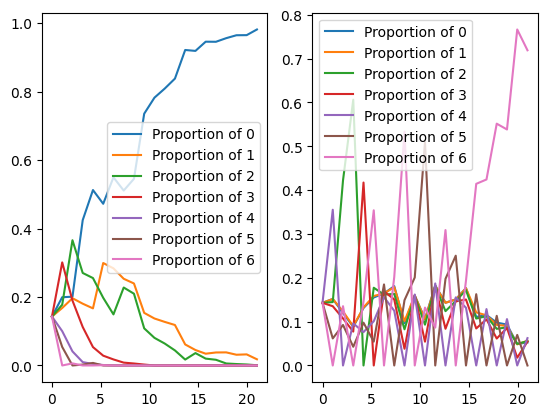

In [34]:
kate = Replicator(epochs=20)
kate.run()
kate.visualise()